# Data Preparation

### Settings/Functions
Read in settings and functions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy as sp
import sys
import warnings
from scipy import stats
from scipy.stats import mstats
from scipy.stats import zscore
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Data
Read in the data and take an initial look.

In [2]:
# Import original dataset
data_loc = 'C://Users/User/Documents/GitHub/Python/Ohio Reading/data/'
data = pd.read_csv(data_loc+'reading_data.csv',na_values=['.'])

In [3]:
data.head()

,Year,After,Ohio,School_District,Number_Tested,Pct_Prof_Or_Above,Tot_Pop,Perc_Male,Perc_Female,Perc_Under5,Perc_5to19,Perc_20Plus,Perc_Caucasian,Perc_OtherEthnicity,Perc_NoBach,Perc_BachPlus,Median_Inc
0,2008,0,1,Adams County/Ohio Valley Local School District...,315,67.6,23882,0.50,0.50,0.07,0.18,0.75,0.97,0.03,0.90,0.10,35481
1,2013,1,1,Adams County/Ohio Valley Local School District...,283,78.5,22546,0.50,0.50,0.07,0.19,0.74,0.97,0.03,0.90,0.10,32741
2,2008,0,1,"Akron City School District, Ohio",1801,60.2,190906,0.48,0.52,0.07,0.17,0.76,0.63,0.37,0.82,0.18,34072
3,2013,1,1,"Akron City School District, Ohio",1700,68.8,190599,0.48,0.52,0.07,0.16,0.77,0.61,0.39,0.81,0.19,30438
4,2008,0,1,"Alliance City School District, Ohio",199,61.3,22674,0.48,0.52,0.06,0.17,0.77,0.87,0.13,0.88,0.12,33568


## Describing the Data

### Data Shape

 - The dataset is currently in a long format where each school district has a row for each year of interest. The datasets do not contain an interaction variable, so this will need to be added to the dataset in order to perform the difference-in-difference analysis. The initial dataset has 350 rows and 17 columns.

In [4]:
# Checking the dimensions of the dataset
print("data shape: {}".format(data.shape))

data shape: (350, 17)


### Data Type

 - The dataset contains the following data types:
    - Factors/Strings: (1)
    - Integers (6)
    - Numeric (10)

In [5]:
print("data types: {}".format(data.dtypes.value_counts()))

data types: float64    10
int64       6
object      1
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 350 non-null    int64  
 1   After                350 non-null    int64  
 2   Ohio                 350 non-null    int64  
 3   School_District      350 non-null    object 
 4   Number_Tested        350 non-null    int64  
 5   Pct_Prof_Or_Above    350 non-null    float64
 6   Tot_Pop              350 non-null    int64  
 7   Perc_Male            350 non-null    float64
 8   Perc_Female          350 non-null    float64
 9   Perc_Under5          350 non-null    float64
 10  Perc_5to19           350 non-null    float64
 11  Perc_20Plus          350 non-null    float64
 12  Perc_Caucasian       348 non-null    float64
 13  Perc_OtherEthnicity  348 non-null    float64
 14  Perc_NoBach          349 non-null    float64
 15  Perc_BachPlus        349 non-null    flo

In [7]:
print(data.dtypes) 

Year                     int64
After                    int64
Ohio                     int64
School_District         object
Number_Tested            int64
Pct_Prof_Or_Above      float64
Tot_Pop                  int64
Perc_Male              float64
Perc_Female            float64
Perc_Under5            float64
Perc_5to19             float64
Perc_20Plus            float64
Perc_Caucasian         float64
Perc_OtherEthnicity    float64
Perc_NoBach            float64
Perc_BachPlus          float64
Median_Inc               int64
dtype: object


 - Variable Types:
    - 'School_District' is the only variable that should be a string in the data set.
    - The remaining variables should be numeric.

## Variables Names & Creation

In [8]:
# Checking for duplicate column names
print("data shape: {}".format(data.shape))
data = data.loc[:,~data.columns.duplicated()]
print("data shape: {}".format(data.shape)) 
# No duplicate variable names exist in the dataset

data shape: (350, 17)
data shape: (350, 17)


In [9]:
# Checking variable names
for col in data.columns: 
    print(col) 

Year
After
Ohio
School_District
Number_Tested
Pct_Prof_Or_Above
Tot_Pop
Perc_Male
Perc_Female
Perc_Under5
Perc_5to19
Perc_20Plus
Perc_Caucasian
Perc_OtherEthnicity
Perc_NoBach
Perc_BachPlus
Median_Inc


In [10]:
# Rename all columns to lower case
data.columns = data.columns.str.lower()
data.columns

Index(['year', 'after', 'ohio', 'school_district', 'number_tested',
       'pct_prof_or_above', 'tot_pop', 'perc_male', 'perc_female',
       'perc_under5', 'perc_5to19', 'perc_20plus', 'perc_caucasian',
       'perc_otherethnicity', 'perc_nobach', 'perc_bachplus', 'median_inc'],
      dtype='object')

In [11]:
# Checking the counts years to time
pd.crosstab(data['year'], data['after'])

after,0,1
year,,
2008,175,0
2013,0,175


In [12]:
# Checking the counts of states to time
pd.crosstab(data['ohio'], data['after'])

after,0,1
ohio,,
0,29,29
1,146,146


In [13]:
# Creating the interaction term for difference in difference modeling
data['interaction'] = data.ohio*data.after

* All variable names are now in a clean, consistent format that is compatible for modeling.

## Missing Data

 * The missing values for the ethnicity variables both came from the same school district so those observations were removed from the dataset due to to small impact on the overall dataset.
 * The missing values for the educational attainment variables appear in different school districts. Since the education level variables only had 1 missing variable each, I knew that I would be able to impute from the other year in the dataset for the school district. I did this by using the mean, which is just the value for the second year in the dataset for that school district.

In [14]:
# Function to count the number of nulls in each column
def null_counts(df):
    null_df = pd.DataFrame(df.isnull().sum(),columns=['null_count'])
    null_df['null_fraction'] = null_df['null_count'] / df.shape[0]
    null_df = null_df.sort_values('null_count',ascending=False)
    return null_df

In [15]:
# Checking for null values
null_counts(data)

,null_count,null_fraction
perc_otherethnicity,2,0.005714
perc_caucasian,2,0.005714
perc_bachplus,1,0.002857
perc_nobach,1,0.002857
year,0,0.000000
after,0,0.000000
median_inc,0,0.000000
perc_20plus,0,0.000000
perc_5to19,0,0.000000
perc_under5,0,0.000000


In [16]:
# Checking if the missing values are from the same school
data[data['perc_caucasian'].isnull()]

,year,after,ohio,school_district,number_tested,pct_prof_or_above,tot_pop,perc_male,perc_female,perc_under5,perc_5to19,perc_20plus,perc_caucasian,perc_otherethnicity,perc_nobach,perc_bachplus,median_inc,interaction
218,2008,0,1,Northeastern Local School District (Champaign ...,279,68.8,21049,0.47,0.53,0.03,0.17,0.79,NaN,NaN,0.82,0.18,56065,0
219,2013,1,1,Northeastern Local School District (Champaign ...,251,84.1,22461,0.48,0.52,0.03,0.20,0.77,NaN,NaN,0.77,0.23,53414,1


In [17]:
# Imputing missing values by group for education values
data['perc_nobach'] = data['perc_nobach'].fillna(data.groupby('school_district')['perc_nobach'].transform('mean'))
data['perc_bachplus'] = data['perc_bachplus'].fillna(data.groupby('school_district')['perc_bachplus'].transform('mean'))

In [18]:
# Dropping the missing ethnicity variables since both were from the same school district
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 348 non-null    int64  
 1   after                348 non-null    int64  
 2   ohio                 348 non-null    int64  
 3   school_district      348 non-null    object 
 4   number_tested        348 non-null    int64  
 5   pct_prof_or_above    348 non-null    float64
 6   tot_pop              348 non-null    int64  
 7   perc_male            348 non-null    float64
 8   perc_female          348 non-null    float64
 9   perc_under5          348 non-null    float64
 10  perc_5to19           348 non-null    float64
 11  perc_20plus          348 non-null    float64
 12  perc_caucasian       348 non-null    float64
 13  perc_otherethnicity  348 non-null    float64
 14  perc_nobach          348 non-null    float64
 15  perc_bachplus        348 non-null    flo

In [19]:
# Last check for null values
null_counts(data)

,null_count,null_fraction
year,0,0.0
after,0,0.0
median_inc,0,0.0
perc_bachplus,0,0.0
perc_nobach,0,0.0
perc_otherethnicity,0,0.0
perc_caucasian,0,0.0
perc_20plus,0,0.0
perc_5to19,0,0.0
perc_under5,0,0.0


### Exploratory Analysis

#### Statistical Description

In [20]:
# Checking the descriptive statistics of the data
descriptive_data = data.describe()

# Saving output to CSV for easier analysis
descriptive_data.to_csv(data_loc+'/describe_output.csv')
descriptive_data

,year,after,ohio,number_tested,pct_prof_or_above,tot_pop,perc_male,perc_female,perc_under5,perc_5to19,perc_20plus,perc_caucasian,perc_otherethnicity,perc_nobach,perc_bachplus,median_inc,interaction
count,348.0000,348.00000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2010.5000,0.50000,0.833333,483.060345,78.942529,49768.574713,0.485460,0.514540,0.063477,0.172126,0.764167,0.833908,0.169713,0.706466,0.293534,52778.500000,0.416667
std,2.5036,0.50072,0.373215,486.707274,11.223446,56862.110497,0.019857,0.019857,0.013463,0.029149,0.035603,0.156444,0.161404,0.151198,0.151198,17839.340726,0.493717
min,2008.0000,0.00000,0.000000,23.000000,45.500000,19642.000000,0.420000,0.410000,0.020000,0.070000,0.660000,0.060000,0.020000,0.260000,0.070000,19023.000000,0.000000
25%,2008.0000,0.00000,1.000000,263.000000,72.150000,25712.750000,0.480000,0.510000,0.057500,0.160000,0.740000,0.810000,0.070000,0.590000,0.160000,39054.750000,0.000000
50%,2010.5000,0.50000,1.000000,324.000000,80.550000,33299.500000,0.480000,0.520000,0.060000,0.170000,0.765000,0.895000,0.110000,0.740000,0.260000,48791.000000,0.000000
75%,2013.0000,1.00000,1.000000,513.500000,87.500000,50959.500000,0.490000,0.520000,0.070000,0.190000,0.780000,0.930000,0.192500,0.840000,0.410000,64843.000000,1.000000
max,2013.0000,1.00000,1.000000,4193.000000,97.200000,503605.000000,0.590000,0.580000,0.100000,0.260000,0.890000,0.980000,0.940000,0.930000,0.740000,109570.000000,1.000000


#### Correlation

 - The only variables that seem to be highly correlated are the variables that I expected. These are the variables that are meant to add to one. For example, 'perc_male' and 'perc_female' add to one for each district. This was expected and will be handled in the modeling notebook by excluding on the variables from the models. Once these variables are dropped during modeling, I don't expect multicollinearity to be an issue with the control variables in this dataset. I will check the VIF when I get to the models though to verify.
 - The 'ohio' and 'after' variables will likely have some collinearity issues with the 'interaction' variable. This is also to be expected due to the nature of the three variables, but this is necessary for the utilization of the difference-in-difference model.

In [21]:
# Correlation Function
def plot_correlation_matrix_heat_map(df,label,qty_fields=10):
    df = pd.concat([df[label],df.drop(label,axis=1)],axis=1)
    correlation_matrix = df.corr()
    index = correlation_matrix.sort_values(label, ascending=False).index
    correlation_matrix = correlation_matrix[index].sort_values(label,ascending=False)

    fig,ax = plt.subplots()
    fig.set_size_inches((10,10))
    sb.heatmap(correlation_matrix.iloc[:qty_fields,:qty_fields],annot=True,fmt='.2f',ax=ax)
    return(fig,ax)

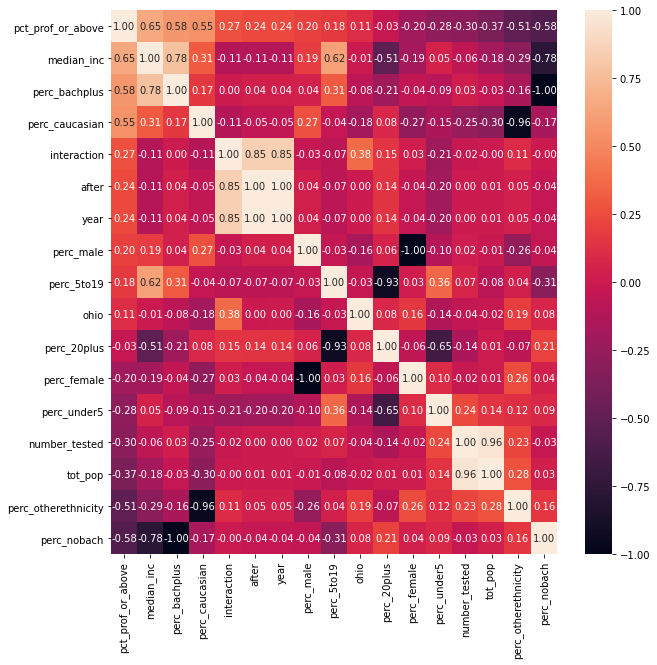

In [22]:
# Correlation Plot
plot_correlation_matrix_heat_map(data,'pct_prof_or_above',20);

#### Variance

 - All variables have acceptable variance.

In [23]:
data.var()

year                   6.268012e+00
after                  2.507205e-01
ohio                   1.392891e-01
number_tested          2.368840e+05
pct_prof_or_above      1.259657e+02
tot_pop                3.233300e+09
perc_male              3.943125e-04
perc_female            3.943125e-04
perc_under5            1.812473e-04
perc_5to19             8.496439e-04
perc_20plus            1.267603e-03
perc_caucasian         2.447460e-02
perc_otherethnicity    2.605121e-02
perc_nobach            2.286096e-02
perc_bachplus          2.286096e-02
median_inc             3.182421e+08
interaction            2.437560e-01
dtype: float64

#### Outliers
##### Boxplot

 - The majority of the variables do not seem to have too many extreme outliers. While there are a few, it does not seem to be impacting every variable.

An exception occurred for column: school_district


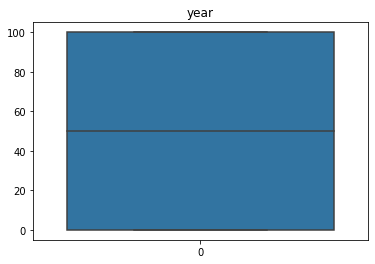

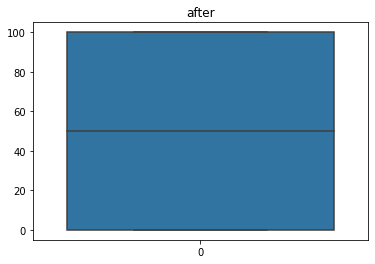

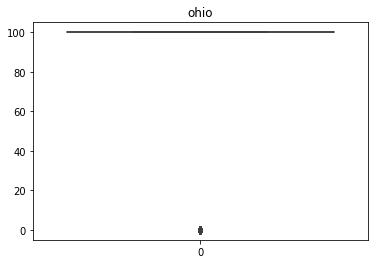

<Figure size 432x288 with 0 Axes>

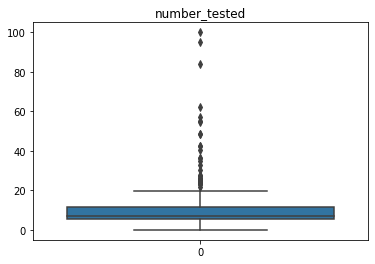

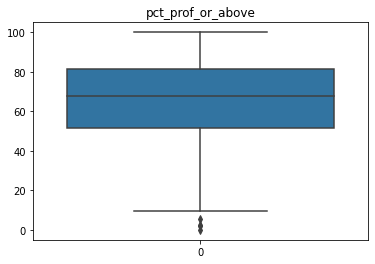

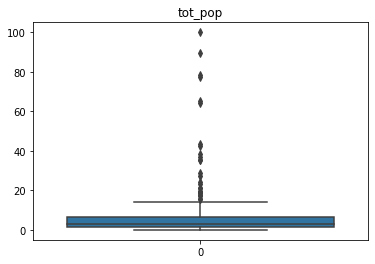

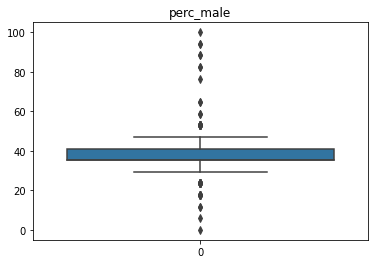

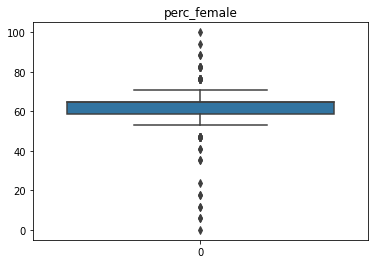

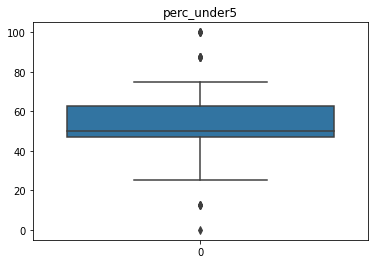

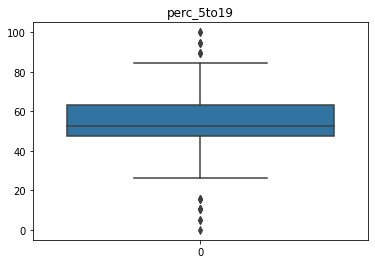

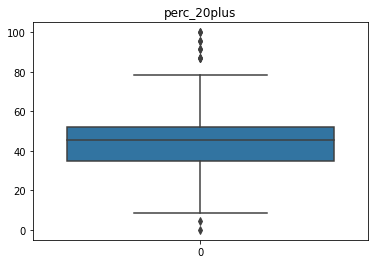

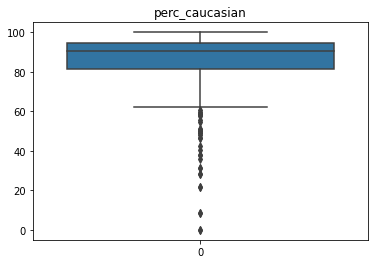

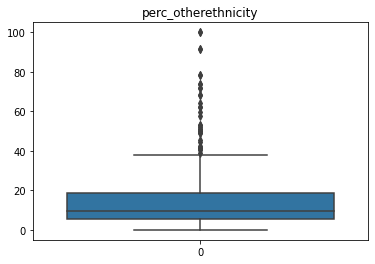

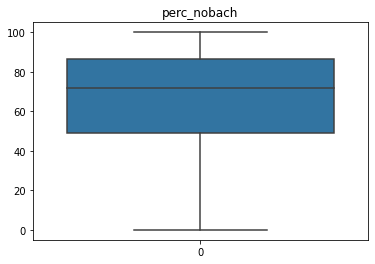

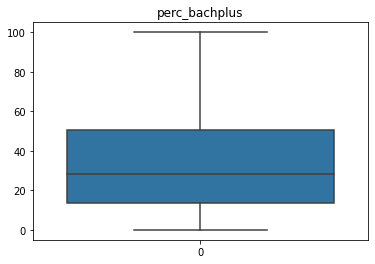

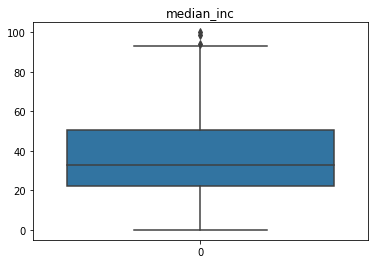

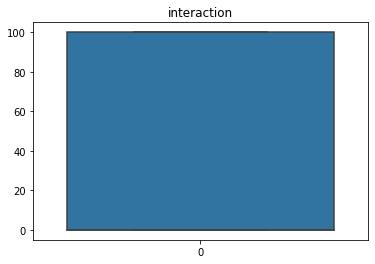

In [24]:
i = 1
for col in data.columns:
    plt.figure(i)
    try:
        sb.boxplot(data=((data[col]-data[col].min())/(data[col].max()-data[col].min()))*100).set_title(col)
    except:
        print("An exception occurred for column: {}".format(col))
    i+=1

##### Z_scores

 - Since z-scores are not necessarily reliable if the data set does not follow a normal distribution, I like to also look at distributions of the data. Some variables are not meant to follow a normal distribution. When looking at z-scores though, I use (-/+) 3 standard deviations as the cut off for an outlier.
 - In this dataset, the majority of the columns do not have a large number of z-score outliers, as evidenced later in this section. The variable 'number_tested' has the most outliers with 10.
 - All observations will be kept in the dataset since the majority are not extreme outliers. If necessary I will scale the variables to reduce the impact of outliers in the modeling notebook.

In [25]:
numeric_cols = data.select_dtypes(exclude=[object])

In [26]:
print(numeric_cols.shape)

(348, 17)


In [27]:
numeric_cols.head(3)

,year,after,ohio,number_tested,pct_prof_or_above,tot_pop,perc_male,perc_female,perc_under5,perc_5to19,perc_20plus,perc_caucasian,perc_otherethnicity,perc_nobach,perc_bachplus,median_inc,interaction
0,2008,0,1,315,67.6,23882,0.50,0.50,0.07,0.18,0.75,0.97,0.03,0.90,0.10,35481,0
1,2013,1,1,283,78.5,22546,0.50,0.50,0.07,0.19,0.74,0.97,0.03,0.90,0.10,32741,1
2,2008,0,1,1801,60.2,190906,0.48,0.52,0.07,0.17,0.76,0.63,0.37,0.82,0.18,34072,0


In [28]:
# Note that `select_dtypes` returns a data frame. We are selecting only the columns
zscores = numeric_cols.apply(zscore)

In [29]:
print(zscores)

     year  after      ohio  number_tested  pct_prof_or_above   tot_pop  \
0    -1.0   -1.0  0.447214      -0.345798          -1.012065 -0.455907   
1     1.0    1.0  0.447214      -0.411640          -0.039486 -0.479437   
2    -1.0   -1.0  0.447214       2.711768          -1.672349  2.485674   
3     1.0    1.0  0.447214       2.503953          -0.904992  2.480267   
4    -1.0   -1.0  0.447214      -0.584477          -1.574199 -0.477182   
..    ...    ...       ...            ...                ...       ...   
345   1.0    1.0  0.447214      -0.314934          -0.307168 -0.216000   
346  -1.0   -1.0  0.447214       0.020452          -1.832958  0.346413   
347   1.0    1.0  0.447214      -0.135925          -2.056027  0.319273   
348  -1.0   -1.0  0.447214      -0.376662          -1.752654 -0.405696   
349   1.0    1.0  0.447214      -0.475425          -0.458855 -0.399603   

     perc_male  perc_female  perc_under5  perc_5to19  perc_20plus  \
0     0.733290    -0.733290     0.485217  

In [30]:
zscores.describe()

,year,after,ohio,number_tested,pct_prof_or_above,tot_pop,perc_male,perc_female,perc_under5,perc_5to19,perc_20plus,perc_caucasian,perc_otherethnicity,perc_nobach,perc_bachplus,median_inc,interaction
count,348.00000,348.00000,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02
mean,0.00000,0.00000,-1.122984e-16,-3.062684e-17,3.266863e-16,1.020895e-17,3.228580e-16,2.677296e-15,-1.000477e-15,3.879400e-16,4.491937e-16,-1.582387e-16,6.125368e-17,-6.355070e-16,-1.046417e-16,-2.041789e-17,-2.297013e-17
std,1.00144,1.00144,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00,1.001440e+00
min,-1.00000,-1.00000,-2.236068e+00,-9.466117e-01,-2.983993e+00,-5.305810e-01,-3.301255e+00,-5.272154e+00,-3.234065e+00,-3.508687e+00,-2.929962e+00,-4.954005e+00,-9.289009e-01,-2.957097e+00,-1.480547e+00,-1.894919e+00,-8.451543e-01
25%,-1.00000,-1.00000,4.472136e-01,-4.527921e-01,-6.060803e-01,-4.236646e-01,-2.753461e-01,-2.289720e-01,-4.446038e-01,-4.166195e-01,-6.797512e-01,-1.530422e-01,-6.186730e-01,-7.713918e-01,-8.844455e-01,-7.704046e-01,-8.451543e-01
50%,0.00000,0.00000,4.472136e-01,-3.272796e-01,1.434306e-01,-2.900488e-01,-2.753461e-01,2.753461e-01,-2.586397e-01,-7.305650e-02,2.343970e-02,3.910670e-01,-3.704906e-01,2.221106e-01,-2.221106e-01,-2.238447e-01,-8.451543e-01
75%,1.00000,1.00000,4.472136e-01,6.263207e-02,7.635617e-01,2.097425e-02,2.289720e-01,2.753461e-01,4.852167e-01,6.140695e-01,4.453542e-01,6.151119e-01,1.413855e-01,8.844455e-01,7.713918e-01,6.772600e-01,1.183216e+00
max,1.00000,1.00000,4.472136e-01,7.633503e+00,1.629068e+00,7.992843e+00,5.272154e+00,3.301255e+00,2.716786e+00,3.019011e+00,3.539394e+00,9.351761e-01,4.779293e+00,1.480547e+00,2.957097e+00,3.188082e+00,1.183216e+00


In [31]:
# Count the number of observations in each column that are above or below 3
zscores[(np.abs(zscores > 3))].count()

year                    0
after                   0
ohio                    0
number_tested           9
pct_prof_or_above       0
tot_pop                 8
perc_male               8
perc_female             1
perc_under5             0
perc_5to19              2
perc_20plus             4
perc_caucasian          0
perc_otherethnicity    10
perc_nobach             0
perc_bachplus           0
median_inc              2
interaction             0
dtype: int64

#### Distributions
 - While some of the variables follow a normal or near-normal distribution, many of the variables are skewed to either the left of the right.       

An exception occurred for column: school_district


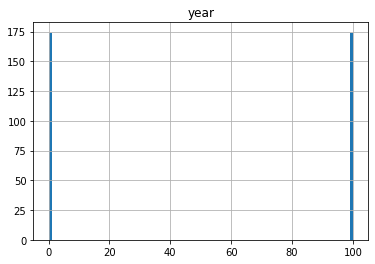

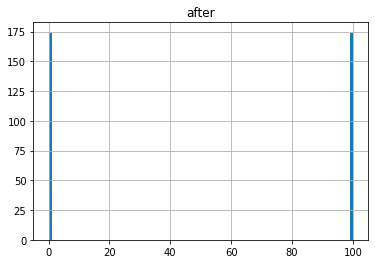

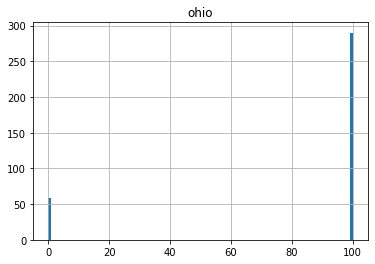

<Figure size 432x288 with 0 Axes>

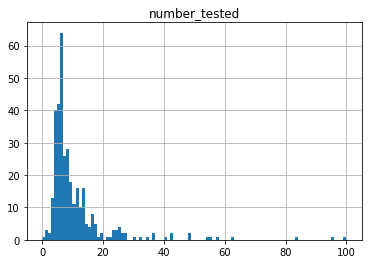

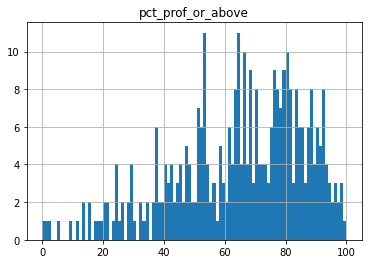

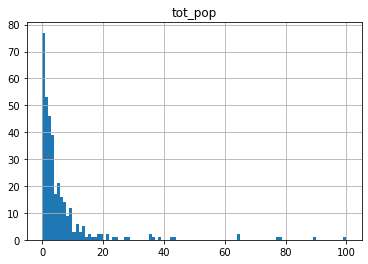

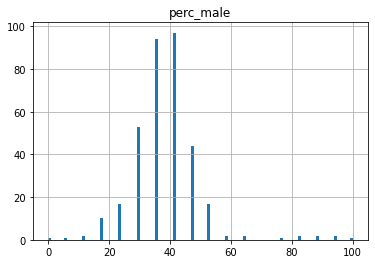

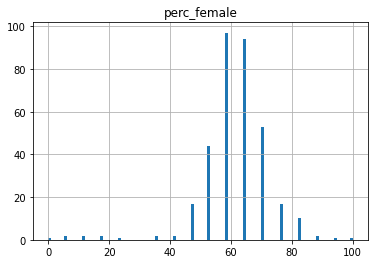

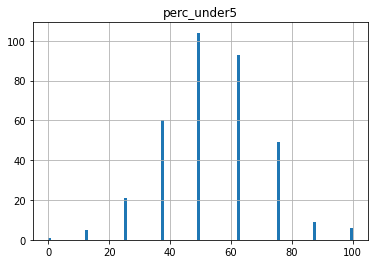

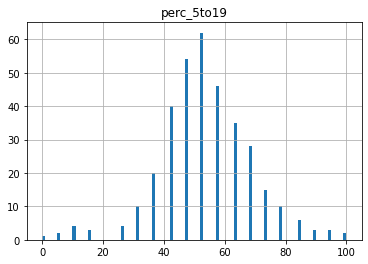

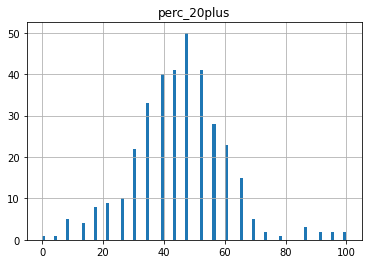

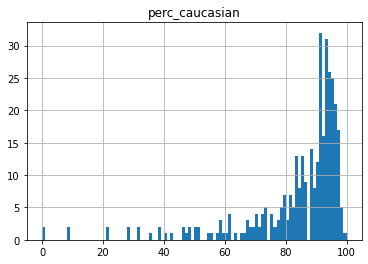

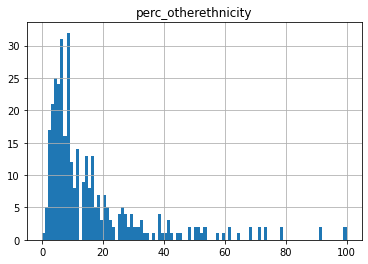

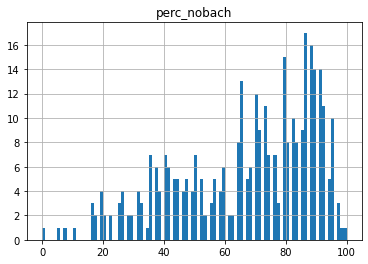

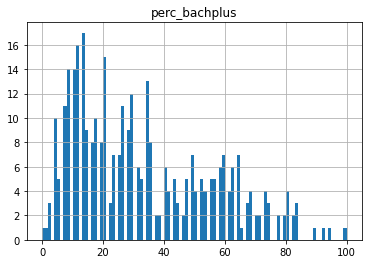

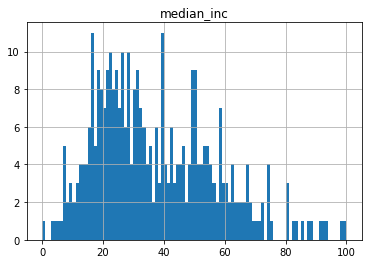

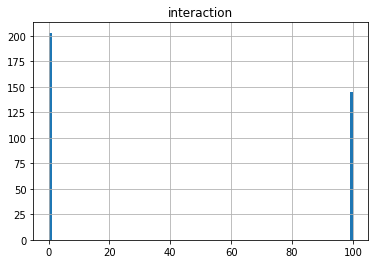

In [32]:
# Creating a histogram for each variables
i = 1
for col in data.columns:
    plt.figure(i)
    try:
        data2=((data[col]-data[col].min())/(data[col].max()-data[col].min()))*100
        data2.hist(bins=100)
        plt.title(col)
    except:
        print("An exception occurred for column: {}".format(col))
    
    i+=1
plt.show()

### Variable Transformations

* Two of the variables that will be used in the model need to be log transformed. They are the only variables in the dataset that are large, whole numbers and may have a negative impact on the model.

In [33]:
# Creating logged versions of certain variables
log_df = data[['tot_pop','median_inc']].apply(lambda x: np.log(x+1))

# Rename columns
log_df = pd.DataFrame(log_df)
log_df.columns = ['tot_pop_log', 'median_inc_log']
data = pd.concat([log_df, data], axis=1)
data.head()

,tot_pop_log,median_inc_log,year,after,ohio,school_district,number_tested,pct_prof_or_above,tot_pop,perc_male,perc_female,perc_under5,perc_5to19,perc_20plus,perc_caucasian,perc_otherethnicity,perc_nobach,perc_bachplus,median_inc,interaction
0,10.080922,10.476781,2008,0,1,Adams County/Ohio Valley Local School District...,315,67.6,23882,0.50,0.50,0.07,0.18,0.75,0.97,0.03,0.90,0.10,35481,0
1,10.023357,10.396414,2013,1,1,Adams County/Ohio Valley Local School District...,283,78.5,22546,0.50,0.50,0.07,0.19,0.74,0.97,0.03,0.90,0.10,32741,1
2,12.159542,10.436261,2008,0,1,"Akron City School District, Ohio",1801,60.2,190906,0.48,0.52,0.07,0.17,0.76,0.63,0.37,0.82,0.18,34072,0
3,12.157932,10.323480,2013,1,1,"Akron City School District, Ohio",1700,68.8,190599,0.48,0.52,0.07,0.16,0.77,0.61,0.39,0.81,0.19,30438,1
4,10.029018,10.421358,2008,0,1,"Alliance City School District, Ohio",199,61.3,22674,0.48,0.52,0.06,0.17,0.77,0.87,0.13,0.88,0.12,33568,0


## Verifying the Data Quality

### Data Source and Reliability

- Data Origin: Reading scores were pulled directly from the Ohio Department of Education & Iowa Department of Education's websites while demographic information was pulled directly from the U.S. Census Bureau's website. Due to the sources from which the data was pulled, I believe it to be highly reliable. 
- Reliability: Due to the sources from which the data was pulled, I believe it to be highly reliable. 

## Save the Modeling Dataset

In [35]:
# Exporting the data set to CSV 
data.to_csv((data_loc+'/reading_clean.csv'), index = False)